In [12]:
import importlib.util
import sys
import subprocess

package_name = 'xlsxwriter' 
if importlib.util.find_spec(package_name) is None:
    print(f"{package_name} not found. Installing...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "xlsxwriter"])
else:
    print(f"{package_name} is already installed.")

xlsxwriter is already installed.


In [13]:
import pandas as pd
import numpy as np

In [14]:
positions = pd.read_csv('positions.csv', index_col=[0])
positions.index = pd.to_datetime(positions.index)
returns = pd.read_csv('returns.csv', index_col=[0])
returns.index = pd.to_datetime(returns.index)

In [15]:
positions

,C 1 Comdty,CL1 Comdty,GC1 Comdty,HG1 Comdty,NG1 Comdty,S 1 Comdty,SI1 Comdty
2023-01-16,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2023-01-17,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2023-01-18,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2023-01-19,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2023-01-20,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...
2026-01-12,-10.00,0.00,0.00,-1.00,0.00,4.00,0.00
2026-01-13,-10.00,0.00,0.00,-1.00,0.00,4.00,0.00
2026-01-14,-10.00,0.00,0.00,-1.00,0.00,4.00,0.00
2026-01-15,-10.00,0.00,0.00,-1.00,0.00,4.00,0.00


In [16]:
returns

,C 1 Comdty,CL1 Comdty,GC1 Comdty,HG1 Comdty,NG1 Comdty,S 1 Comdty,SI1 Comdty
2023-01-16,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2023-01-17,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00
2023-01-18,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00
2023-01-19,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00
2023-01-20,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00
...,...,...,...,...,...,...,...
2026-01-12,0.02,0.00,0.00,-0.01,-0.00,-0.00,0.00
2026-01-13,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00
2026-01-14,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00
2026-01-15,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00


In [17]:
pnls = returns * 4500000
pnls

,C 1 Comdty,CL1 Comdty,GC1 Comdty,HG1 Comdty,NG1 Comdty,S 1 Comdty,SI1 Comdty
2023-01-16,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2023-01-17,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00
2023-01-18,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00
2023-01-19,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00
2023-01-20,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00
...,...,...,...,...,...,...,...
2026-01-12,"91,607.70",0.00,0.00,"-25,923.03","-18,867.29","-19,491.00",0.00
2026-01-13,"6,826.05",0.00,-0.00,"3,022.96",0.00,"-15,992.46",0.00
2026-01-14,"-8,772.41",0.00,0.00,"-7,700.23",-0.00,"5,848.27",0.00
2026-01-15,"6,822.64",-0.00,-0.00,"12,475.68",0.00,"16,374.33",0.00


In [7]:
pnls.to_csv('pnls.csv')

In [8]:
pnls.sum(axis=0).sum()

2651344.545895268

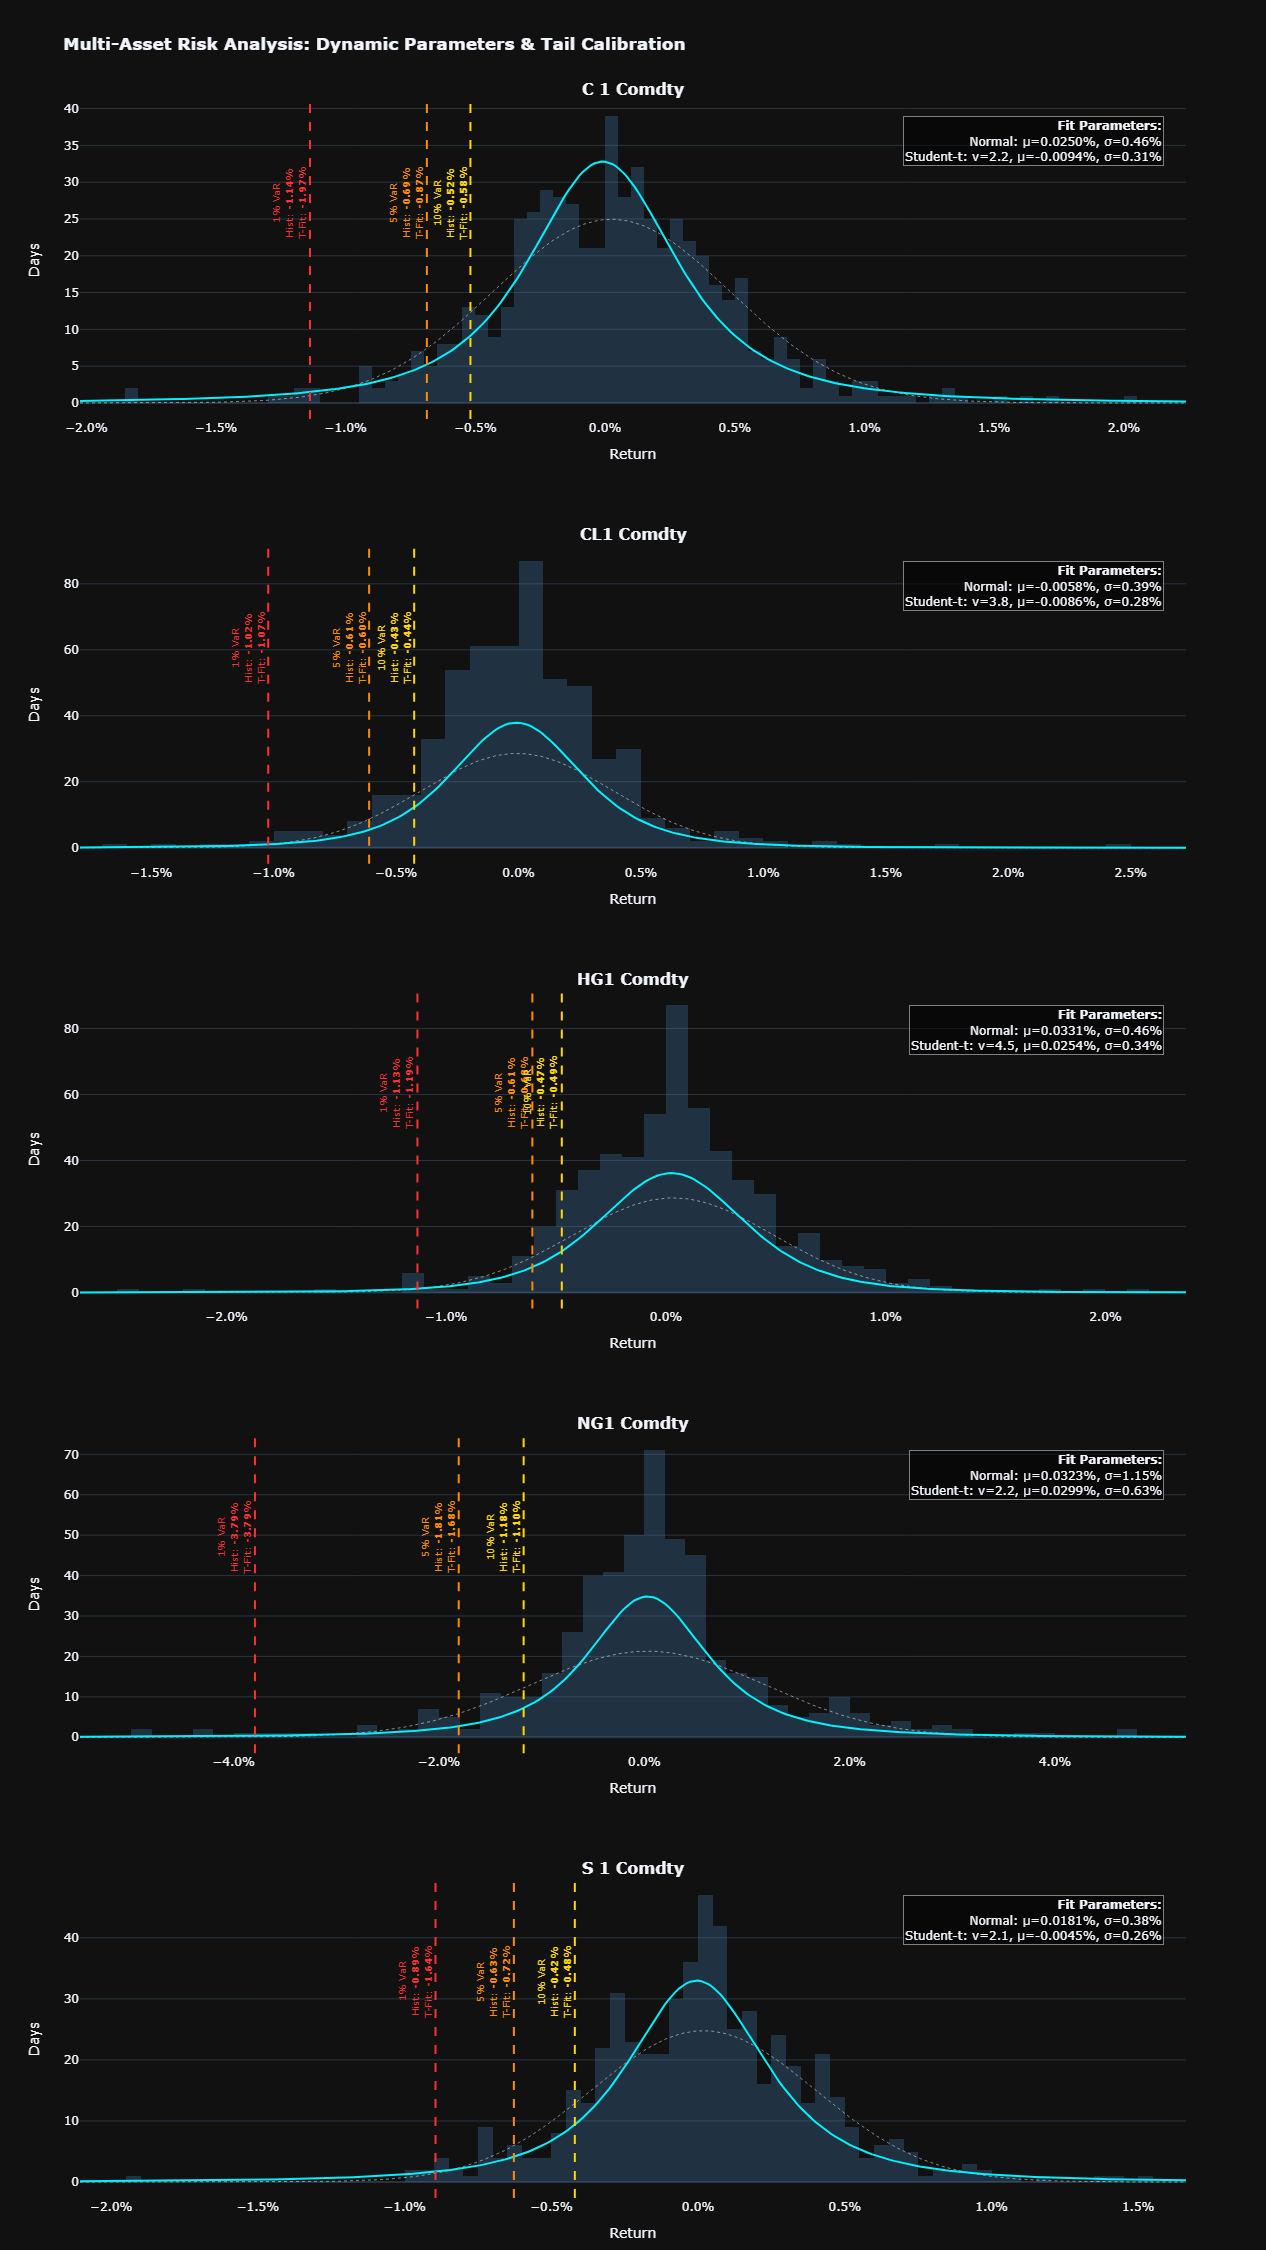

In [39]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import norm, t

def plot_interactive_risk_grid(returns_df, positions_df, confidence_levels=[0.01, 0.05, 0.10]):
    """
    Plots a wide-view risk profile for each ticker.
    Displays unique fit parameters (Normal & Student-t) and VaR metrics
    directly on each individual subplot.
    """
    tickers = returns_df.columns
    n_tickers = len(tickers)
    
    # Use one column to maximize the horizontal view of the tails
    rows = n_tickers
    cols = 1
    
    fig = make_subplots(
        rows=rows, cols=cols,
        subplot_titles=[f"<b>{t}</b>" for t in tickers],
        vertical_spacing=0.06
    )

    var_colors = {0.01: '#FF3131', 0.05: '#FF8C00', 0.10: '#FFD700'}
    
    for i, ticker in enumerate(tickers):
        # 1. Mask Active Returns
        active_returns = returns_df[ticker][positions_df[ticker] != 0].dropna()
        if active_returns.empty: continue
        n_obs = len(active_returns)
        
        # 2. Compute Ticker-Specific Parameters
        mu, std = norm.fit(active_returns)
        nu, mu_t, sigma_t = t.fit(active_returns)
        
        # 3. Compute VaR Metrics
        hist_vars = {level: active_returns.quantile(level) for level in confidence_levels}
        st_vars = {level: t.ppf(level, nu, loc=mu_t, scale=sigma_t) for level in confidence_levels}
        
        # 4. Curve Generation (properly scaled to count frequency)
        counts, bin_edges = np.histogram(active_returns, bins=80)
        bin_width = bin_edges[1] - bin_edges[0]
        x_fit = np.linspace(active_returns.min() * 1.1, active_returns.max() * 1.1, 300)
        
        y_norm = norm.pdf(x_fit, mu, std) * n_obs * bin_width
        y_t_fit = t.pdf(x_fit, nu, mu_t, sigma_t) * n_obs * bin_width

        # 5. Build Subplot Traces
        # Histogram
        fig.add_trace(go.Histogram(
            x=active_returns, nbinsx=80, marker_color='rgba(70, 130, 180, 0.3)',
            name=f'Hist {ticker}', showlegend=False), row=i+1, col=1)

        # Normal Fit (Dotted White)
        fig.add_trace(go.Scatter(
            x=x_fit, y=y_norm, mode='lines',
            line=dict(color='rgba(255, 255, 255, 0.5)', width=1, dash='dot'),
            name='Normal Fit', showlegend=False), row=i+1, col=1)

        # Student-t Fit (Solid Cyan)
        fig.add_trace(go.Scatter(
            x=x_fit, y=y_t_fit, mode='lines',
            line=dict(color='#00f2ff', width=2),
            name='Student-t Fit', showlegend=False), row=i+1, col=1)

        # 6. Insert Local Parameter Box (Static text for each chart)
        stats_text = (
            f"<b>Fit Parameters:</b><br>"
            f"Normal: μ={mu:.4%}, σ={std:.2%}<br>"
            f"Student-t: ν={nu:.1f}, μ={mu_t:.4%}, σ={sigma_t:.2%}"
        )
        
        fig.add_annotation(
            # REMOVED: xref=f"x{i+1} domain", yref=f"y{i+1} domain"
            x=0.98, 
            y=0.95, 
            xref="x domain", # Use generic 'domain' or let Plotly handle it via row/col
            yref="y domain",
            text=stats_text,
            showarrow=False, 
            align="right",
            bgcolor="rgba(0,0,0,0.5)", 
            bordercolor="gray", 
            borderwidth=1,
            row=i+1, 
            col=1
        )

        # 7. VaR Annotations
        for level in confidence_levels:
            h_val = hist_vars[level]
            t_val = st_vars[level]
            
            fig.add_vline(x=h_val, line_dash="dash", line_color=var_colors[level], row=i+1, col=1)
            
            fig.add_annotation(
                x=h_val, 
                y=0.8, # Use relative y-position (0 to 1) 
                yref="y domain", # Reference the subplot's height
                text=f"{int(level*100)}% VaR<br>Hist: <b>{h_val:.2%}</b><br>T-Fit: <b>{t_val:.2%}</b>",
                showarrow=False, 
                font=dict(color=var_colors[level], size=10),
                textangle=-90, 
                xanchor='right', 
                row=i+1, 
                col=1
            )

        fig.update_xaxes(tickformat=".1%", title_text="Return", row=i+1, col=1)
        fig.update_yaxes(title_text="Days", row=i+1, col=1)

    fig.update_layout(
        height=450 * n_tickers, width=1200, template="plotly_dark",
        title_text="<b>Multi-Asset Risk Analysis: Dynamic Parameters & Tail Calibration</b>",
        margin=dict(t=100, b=50, l=80, r=80)
    )
    return fig

# Execution
fig = plot_interactive_risk_grid(
    returns.drop(columns=['GC1 Comdty', 'SI1 Comdty']), 
    positions
)
fig.show()

In [9]:
def ticker_monthly_performance(daily_pnls: pd.DataFrame, capital: float=1000000.0):
    pnls = daily_pnls.copy()
    # Assuming 'pnls' is your existing dataframe
    # 1. Melt the dataframe to make it long-form for easier grouping
    df_long = pnls.reset_index().melt(id_vars='index', var_name='ticker', value_name='daily_pnl')
    df_long.rename(columns={'index': 'date'}, inplace=True)
    
    # 2. Setup time groupings
    df_long['month'] = df_long['date'].dt.to_period('M')
    
    # 3. Calculate Cumulative PnL within each month for each ticker
    df_long['cum_pnl'] = df_long.groupby(['ticker', 'month'])['daily_pnl'].cumsum()

    # 4. Define a function to extract the specific drawdown metrics per group
    def get_monthly_stats(group, capital=1000000):
        # Aggregated PnL
        total_pnl = group['daily_pnl'].sum()
        
        # Peak and Trough within the month
        peak_idx = group['cum_pnl'].idxmax()
        peak_val = group.loc[peak_idx, 'cum_pnl']
        peak_date = group.loc[peak_idx, 'date']
        
        # Trough must occur AT or AFTER the peak to be a drawdown
        post_peak_df = group.loc[peak_idx:]
        trough_idx = post_peak_df['cum_pnl'].idxmin()
        trough_val = post_peak_df.loc[trough_idx, 'cum_pnl']
        trough_date = post_peak_df.loc[trough_idx, 'date']
        
        # Calculations
        dollar_drawdown = trough_val - peak_val
        # PnL change % (relative to the peak value, handle zero)
        pnl_change_pct = (dollar_drawdown / abs(peak_val)) * 100 if peak_val != 0 else 0
        # Drawdown % relative to capital
        drawdown_cap_pct = (dollar_drawdown / (capital + peak_val)) * 100
    
        return pd.Series({
            'Monthly PnL': total_pnl,
            'Peak PnL': peak_val,
            'Trough PnL': trough_val,
            'Peak to Trough Period': f"{peak_date.date()} to {trough_date.date()}",
            'Peak to Trough ($)': dollar_drawdown,
            'PnL Change (%) P to T': pnl_change_pct,
            'Drawdown (% Capital)': drawdown_cap_pct
        })
    
    # 5. Apply the logic
    # Adjust 'capital' to your actual allocated amount
    monthly_performance = df_long.groupby(['ticker', 'month']).apply(get_monthly_stats, capital=capital)

    return monthly_performance

In [10]:
def portfolio_monthly_performance(daily_pnls: pd.DataFrame, capital: float=1000000.0):
    pnls = daily_pnls.copy()
    # 1. Calculate the daily Portfolio PnL
    # This sums the PnL of all tickers for each day
    pnls['Portfolio'] = pnls.sum(axis=1)
    
    # 2. Setup the grouping and capital
    capital_allocated = capital  # Replace with your actual capital (e.g., 10M)
    portfolio_df = pnls[['Portfolio']].copy()
    portfolio_df['month'] = portfolio_df.index.to_period('M')
    
    # 3. Define the aggregation logic for the portfolio
    def get_portfolio_metrics(group, capital):
        # Daily PnL values for the month
        daily_values = group['Portfolio']
        
        # Calculate cumulative PnL within the month to find peaks/troughs
        cum_pnl = daily_values.cumsum()
        
        # Monthly Aggregated PnL
        total_monthly_pnl = daily_values.sum()
        
        # Monthly Peak PnL (Highest cumulative point reached in the month)
        peak_val = cum_pnl.max()
        peak_date = cum_pnl.idxmax()
        
        # Monthly Trough PnL (Lowest point reached AFTER the peak in the month)
        # This represents the maximum drawdown sequence within that month
        post_peak_series = cum_pnl.loc[peak_date:]
        trough_val = post_peak_series.min()
        trough_date = post_peak_series.idxmin()
        
        # Dollar amount of peak to trough
        dollar_drawdown = trough_val - peak_val 
        
        # PnL change (%) from peak (relative to the peak value)
        pnl_change_pct = (dollar_drawdown / abs(peak_val)) * 100 if peak_val != 0 else 0
        
        # Drawdown % relative to the allocated capital
        drawdown_cap_pct = (dollar_drawdown / (capital + peak_val)) * 100
        
        return pd.Series({
            'Monthly PnL': total_monthly_pnl,
            'Peak PnL': peak_val,
            'Trough PnL': trough_val,
            'Peak to Trough Period': f"{peak_date.date()} to {trough_date.date()}",
            'Peak to Trough ($)': dollar_drawdown,
            'PnL Change (%) P to T': pnl_change_pct,
            'Drawdown (% Capital)': drawdown_cap_pct,
        })
    
    # 4. Generate the table
    port_monthly_performance = (
        portfolio_df.groupby('month')
        .apply(get_portfolio_metrics, capital=capital_allocated)
    )
    
    # Optional: Format for display
    pd.options.display.float_format = '{:,.2f}'.format
    
    
    # 2. Add the Cumulative PnL column AFTER the groupby
    # This will sum the 'Monthly PnL' column row by row (month by month)
    port_monthly_performance['Monthly Cum PnL'] = port_monthly_performance['Monthly PnL'].cumsum()
    
    # 3. Optional: Reorder columns to put Cumulative PnL near Monthly PnL
    cols = list(port_monthly_performance.columns)
    # Move 'Cumulative PnL' to the second position
    cols.insert(1, cols.pop(cols.index('Monthly Cum PnL')))
    port_monthly_performance = port_monthly_performance[cols]
    
    port_monthly_performance['AUM ($)'] = capital_allocated + port_monthly_performance['Monthly Cum PnL']
    port_monthly_performance['AUM (%)'] = (port_monthly_performance['AUM ($)'].pct_change())*100
    port_monthly_performance.iloc[0, port_monthly_performance.columns.get_loc('AUM (%)')] = (
        port_monthly_performance.iloc[0, port_monthly_performance.columns.get_loc('Monthly PnL')] / capital_allocated) * 100
    return port_monthly_performance

In [11]:

# Run calculations
capital = 4500000
ticker_perf = ticker_monthly_performance(daily_pnls=pnls, capital=capital)
port_perf = portfolio_monthly_performance(daily_pnls=pnls, capital=capital)

# Create formatted Excel
output_file = 'Performance_Report.xlsx'
writer = pd.ExcelWriter(output_file, engine='xlsxwriter')

# 1. Ticker Performance Sheet
ticker_perf_reset = ticker_perf.reset_index()
ticker_perf_reset['month'] = ticker_perf_reset['month'].astype(str)
ticker_perf_reset.to_excel(writer, sheet_name='Ticker Performance', index=False)

# 2. Portfolio Performance Sheet
port_perf_reset = port_perf.reset_index()
port_perf_reset['month'] = port_perf_reset['month'].astype(str)
port_perf_reset.to_excel(writer, sheet_name='Portfolio Performance', index=False)

# 3. daily positions
sample_positions = positions[positions.index>='2026-01-01'].reset_index().rename(columns={'index': 'Date'})
sample_positions['Date'] = sample_positions['Date'].astype(str)
sample_positions.to_excel(writer, sheet_name='Daily Positions', index=False)

workbook = writer.book

# Formats
header_format = workbook.add_format({'bold': True, 'bg_color': '#1F4E78', 'font_color': 'white', 'border': 1, 'align': 'center'})
money_format = workbook.add_format({'num_format': '#,##0.00', 'border': 1})
percent_format = workbook.add_format({'num_format': '0.00%', 'border': 1})
generic_format = workbook.add_format({'border': 1})

# Signal colors
green_fmt = workbook.add_format({'font_color': '#006100', 'bg_color': '#C6EFCE', 'border': 1})
red_fmt = workbook.add_format({'font_color': '#9C0006', 'bg_color': '#FFC7CE', 'border': 1})

def format_sheet(worksheet, df):
    # Format headers
    for col_num, value in enumerate(df.columns.values):
        worksheet.write(0, col_num, value, header_format)
    
    # Auto-width and cell formats
    for i, col in enumerate(df.columns):
        width = max(len(col), 18)
        worksheet.set_column(i, i, width)
        
        # Select format
        target_fmt = generic_format
        if any(x in col for x in ['PnL', '($)', 'AUM ($)']):
            target_fmt = money_format
        elif any(x in col for x in ['%', 'Return']):
            target_fmt = percent_format
            
        # Apply formatting to all data rows
        for row in range(1, len(df) + 1):
            val = df.iloc[row-1, i]
            # Handle conditional formatting manually or via xlsxwriter conditional_format
            # Conditional format for performance columns
            if any(x in col for x in ['PnL', 'Change', 'Drawdown', 'AUM (%)']):
                try:
                    num_val = round(val, 2) if '%' in col else float(val)
                    if num_val < 0:
                        worksheet.write(row, i, num_val, red_fmt if '%' in col else workbook.add_format({'num_format': '#,##0.00', 'font_color': '#9C0006', 'bg_color': '#FFC7CE', 'border': 1}))
                    elif num_val > 0 and ('PnL' in col or 'AUM (%)' in col):
                        worksheet.write(row, i, num_val, green_fmt if '%' in col else workbook.add_format({'num_format': '#,##0.00', 'font_color': '#006100', 'bg_color': '#C6EFCE', 'border': 1}))
                    else:
                        worksheet.write(row, i, num_val, target_fmt)
                except:
                    worksheet.write(row, i, val, target_fmt)
            else:
                worksheet.write(row, i, val, target_fmt)

    worksheet.freeze_panes(1, 0)

format_sheet(writer.sheets['Ticker Performance'], ticker_perf_reset)
format_sheet(writer.sheets['Portfolio Performance'], port_perf_reset)
format_sheet(writer.sheets['Daily Positions'], sample_positions)

writer.close()
print(f"Report generated: {output_file}")

Report generated: Performance_Report.xlsx
